<a href="https://colab.research.google.com/github/achintya09/CODSOFT/blob/main/task%204/SALES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CAR SALES PREDICTION PROJECT

##PROJECT INTRODUCTION
  I would like to create a model that can estimate the overall amount of car that consumers would spend given the following characteristics:
customer name, customer email, country, gender, age, annual salary, credit card debt, and net worth
 In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential.

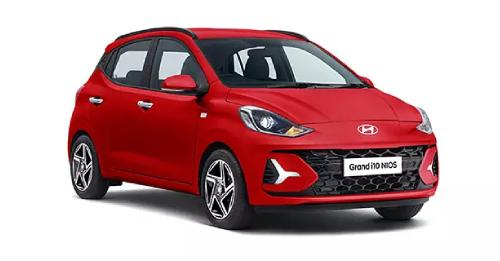

##PROBLEM STATEMENT
* To develop a model that can predict the amount of car purchase of different customers.
* To evaluate and show the performance of the model.
* To develop a user friendly interface that can predict instantly the amount of purchase of a person based on the input values.

##ADDRESSING THE PROBLEM
* Here I am going to use Artificial Neural Networks(ANN) to build the model.

##GETTING STARTED

###IMPORTING LIBRARIES

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###IMPORTING DATASET

In [356]:
dataset = pd.read_csv('car_purchasing.csv',encoding='latin1')
dataset.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### CHECKING DUPLICATE OF MISSING VALUES

In [357]:
dataset.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [358]:
dataset.duplicated().sum()

0

In [359]:
dataset['country'].nunique()

211

###SPLITTING DATASET INTO FEATURE COLUMNS AND TARGET COLUMN

In [360]:
X = dataset.iloc[: , 3:-1].values
y = dataset.iloc[:, -1].values

###SPLITTING THE DATASET INTO TRAIN SET AND TEST SET

In [361]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 42)

FEATURE SCALING

In [362]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

###INTRODUCING MODEL

In [363]:
from tensorflow.keras.models import Sequential
model = Sequential()

###ADDING LAYERS

In [364]:
from tensorflow.keras.layers import Dense
model.add(Dense(units= 6, activation= 'relu'))
model.add(Dense(units= 6, activation = 'relu'))
model.add(Dense(units= 5, activation = 'relu'))
model.add(Dense(units= 5, activation = 'relu'))
model.add(Dense(units= 1))

###COMPILING MODEL

In [365]:
model.compile(optimizer= 'adam', loss = 'mse')

###TRAINING THE TRAIN SET

In [366]:
model.fit(x_train, y_train, batch_size= 10, epochs= 400)

Epoch 1/400
45/45 [==============================] - 1s 2ms/step - loss: 2043094016.0000
Epoch 2/400
45/45 [==============================] - 0s 3ms/step - loss: 2043064320.0000
Epoch 3/400
45/45 [==============================] - 0s 2ms/step - loss: 2042969216.0000
Epoch 4/400
45/45 [==============================] - 0s 2ms/step - loss: 2042691712.0000
Epoch 5/400
45/45 [==============================] - 0s 2ms/step - loss: 2042042624.0000
Epoch 6/400
45/45 [==============================] - 0s 2ms/step - loss: 2040676224.0000
Epoch 7/400
45/45 [==============================] - 0s 2ms/step - loss: 2038013056.0000
Epoch 8/400
45/45 [==============================] - 0s 2ms/step - loss: 2033111040.0000
Epoch 9/400
45/45 [==============================] - 0s 2ms/step - loss: 2024299136.0000
Epoch 10/400
45/45 [==============================] - 0s 2ms/step - loss: 2008655232.0000
Epoch 11/400
45/45 [==============================] - 0s 2ms/step - loss: 1982887808.0000
Epoch 12/400
45/45 

<function matplotlib.pyplot.show(close=None, block=None)>

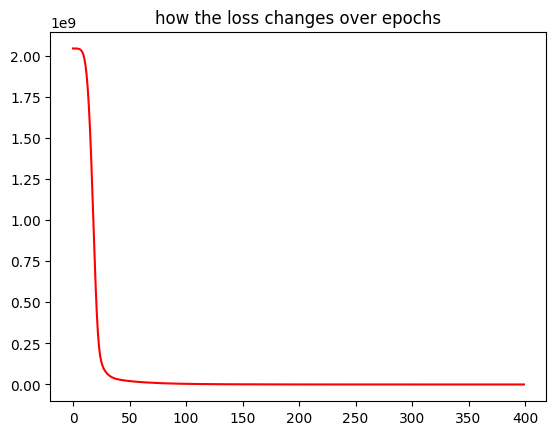

In [367]:
loss_data = pd.DataFrame(model.history.history,)
plt.plot(loss_data, c= 'red')
plt.title("how the loss changes over epochs")
plt.show

### MAKING PREDICTIONS AND COMPARING WITH ACTUAL VALUES

In [368]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 9ms/step


In [369]:
y_pred = pd.DataFrame(y_pred.reshape(len(y_test),1))
y_test = pd.DataFrame(y_test.reshape(len(y_test),1))

In [370]:
test_df = pd.concat((y_test, y_pred), axis=1)

In [371]:
test_df.columns = ['true value', 'predicted value']

In [372]:
test_df

,true value,predicted value
0,46082.80993,43246.582031
1,45058.89690,41428.089844
2,63079.84329,60457.796875
3,31837.22537,28839.884766
4,60461.24268,56546.339844
5,63140.05082,60113.000000
6,52477.83479,48558.316406
7,54755.42038,51434.609375
8,52707.96816,48149.363281
9,47869.82593,45062.878906


###GRAPHICAL REPRESENTATION OF MODEL'S PERFORMANCE

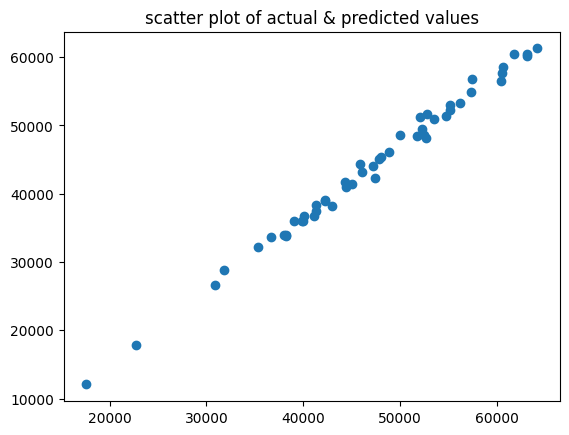

In [373]:
plt.scatter(y_test, y_pred)
plt.title("scatter plot of actual & predicted values")
plt.show()

Text(0.5, 1.0, 'true vs predicted purchase amount for different customers')

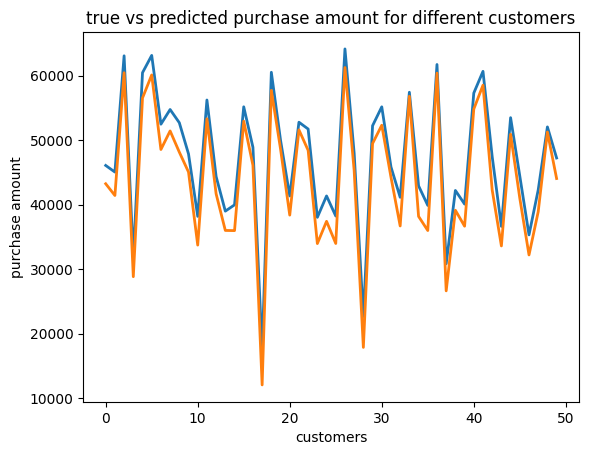

In [374]:
plt.xlabel('customers')
plt.ylabel('purchase amount')
plt.plot(y_test, linewidth= 2) #blue lines
plt.plot(y_pred,linewidth= 2) #orange lines
plt.title('true vs predicted purchase amount for different customers')

MODEL'S PERFORMANCE RESULT

In [375]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

error = mean_absolute_error(y_test, y_pred)
rms_error = (mean_squared_error(y_test,y_pred))**0.5
print("Mean Absolute Error:  ".ljust(32), round(error,2))
print("mean absolute percentage error:".ljust(32),round(mean_absolute_percentage_error(y_test, y_pred),2))
print("root mean squared error:".ljust(32),round(rms_error,2))

Mean Absolute Error:             3152.41
mean absolute percentage error:  0.08
root mean squared error:         3325.56


In [376]:
dataset['car purchase amount'].describe()

count      500.000000
mean     44209.799218
std      10773.178744
min       9000.000000
25%      37629.896040
50%      43997.783390
75%      51254.709517
max      80000.000000
Name: car purchase amount, dtype: float64

##CREATING USER FRIENDLY INTERFACE AND PREDICTING THE AMOUNT

In [377]:
user_input= []
messages = [
    "Enter Gender(1 or 0): ",
    "Enter Age:  ",
    "Enter Annual Salary:  ",
    "Enter Credit Card Debt:  ",
    "Enter Net Worth:  "
]
for message in messages:
  var = input(message)
  user_input.append(var)
result = model.predict(sc.transform([user_input]))
print(" ")
print("Predicted Car Purchase Amount is   ", result[0][0])

Enter Gender(1 or 0): 1
Enter Age:  45
Enter Annual Salary:  55000
Enter Credit Card Debt:  10200
Enter Net Worth:  400000
1/1 [==============================] - 0s 27ms/step
 
Predicted Car Purchase Amount is    34189.293
